<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center; padding: 10px;border-radius:10px 10px;">TP 02 : Regression</p> 

Dans cet exercice, vous allez mettre en œuvre la régression linéaire et voir comment elle
fonctionne sur des données.

**Régression linéaire avec une seule variable**

Dans cette partie de l'exercice, vous allez mettre en œuvre la régression linéaire avec une
variable pour prédire les bénéfices d'un camion de nourriture. Supposons que vous êtes le
CEO d'une franchise de restaurant et que vous envisagez d'ouvrir un nouveau point de
vente dans différentes villes. La chaîne possède déjà des camions dans plusieurs villes et
vous disposez de données sur les bénéfices et la population de ces villes.
Vous souhaitez utiliser ces données pour vous aider à choisir la ville dans laquelle vous allez
vous développer. à la ville suivante.

Le fichier **ex1data1.txt** contient l'ensemble de données pour notre problème de régression
linéaire. La première colonne correspond à **la population d'une ville** et la seconde à le
**bénéfice d'un food truck dans cette ville**. Une valeur négative pour le bénéfice indique une
perte.

Avant de commencer toute tâche, il est souvent utile de comprendre les données en les en
les visualisant. Pour cet ensemble de données, vous pouvez utiliser un diagramme de
dispersion pour visualiser les données. données, puisqu'il n'y a que deux propriétés à
représenter (le bénéfice et la population). (De nombreux problèmes que vous rencontrerez
dans la vie courante sont multidimensionnels et ne peuvent ne peuvent pas être représentés
sur un graphique à deux dimensions).

**- importation des libriries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**- importation de donnée**

In [2]:
data1 = pd.read_csv("ex1data1.txt", sep = ",", header=None)
data1.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


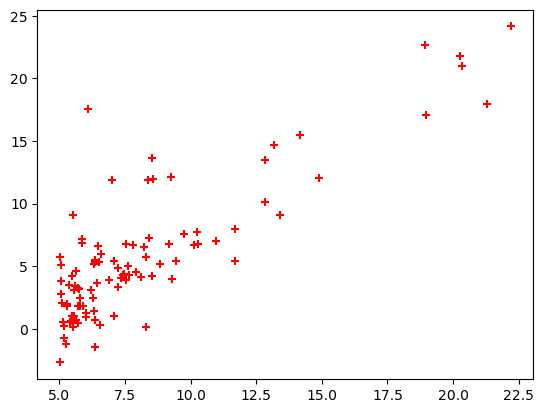

In [3]:
plt.scatter(data1[0], data1[1], c="red", marker="+")

La régression linéaire simple est un algorithme prédictif supervisé. Il prend en entrée une variable prédictive x et va essayer de trouver une fonction de prédiction  $h_\theta(x)$ étant une droite, elle s’écrira mathématiquement sous la forme :
$$ h_\theta(x)=\theta_0+\theta_1 x$$
 Avec $ \theta_0$ et $ \theta_1$ sont les coefficients de la droite.

La fonction de prédiction $ h_\theta(x)=\theta_0+\theta_1 x$

In [4]:
#  split data
x = np.array(data1[0]).reshape(-1, 1)
X = np.hstack((np.ones((x.shape[0], 1)), x))
y = np.array(data1[1]).reshape(-1, 1)
print("The new shape of: \nx:{} \ny:{}".format(X.shape,y.shape))

The new shape of: 
x:(97, 2) 
y:(97, 1)


In [5]:
theta = np.random.randn(2, 1)
theta

array([[ 0.32721725],
       [-0.00320493]])

### Modele Linéaire de prédiction 
Implémention le modèle de prédiction $ H_\theta=X.\theta$

In [6]:
def predict(X, theta):
    return np.dot(X, theta)

###  Fonction Cout 
Ecrire un script qui définit la fonction cout $$ J(\theta)=\frac{1}{2m}\sum(X.\theta-Y)^{2}$$

In [7]:
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    squared_errors = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(squared_errors)
    return cost

In [8]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * (X.T.dot(errors))
        theta = theta - alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

In [9]:
alpha = 0.01
num_iterations = 1500

In [10]:
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

In [11]:
pred = X.dot(theta)
pred[: 5]

array([[3.50466173],
       [2.82663929],
       [6.30860582],
       [4.54439703],
       [3.21326575]])

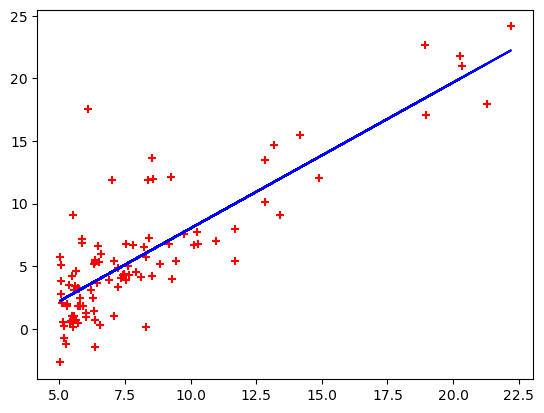

In [12]:
plt.scatter(x, y, color='red', label='Data', marker="+")
plt.plot(x, pred, color='blue', label='Regression line with optimal coefficients')
plt.show()

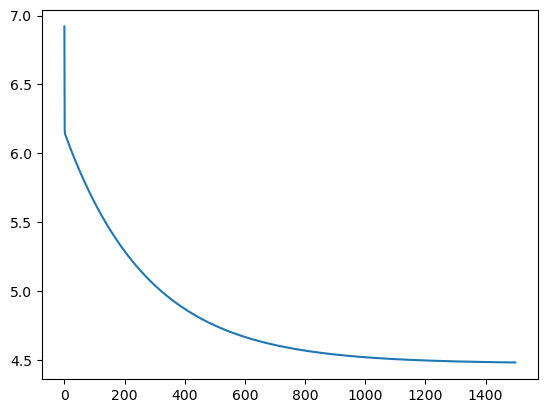

In [13]:
plt.plot(range(1500), cost_history)

In [14]:
def coef_determination(y, pred) :
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [15]:
coef_determination(y, pred)

0.7015319612125445

# Exercice 02

**- importation de donnée**

In [16]:
data = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [17]:
x = data[['Size', 'Bedrooms']].values
y = data['Price'].values

In [18]:
X = data[['Size', 'Bedrooms']].values
y = np.array(data['Price'].values).reshape(-1, 1)
# X = np.column_stack((np.ones(len(X)), X))
print("The new shape of: \nx:{} \ny:{}".format(X.shape,y.shape))

The new shape of: 
x:(47, 2) 
y:(47, 1)


**Normalisation des donnees :**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [20]:
X_scaled

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [21]:
X = np.column_stack((np.ones(len(X_scaled)), X_scaled))

In [22]:
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

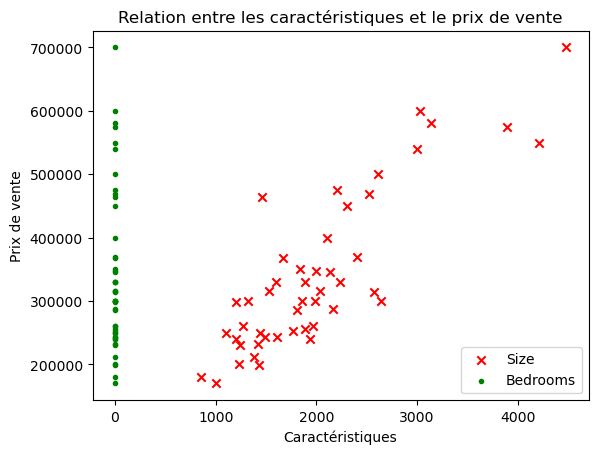

In [23]:
plt.scatter(data['Size'], data['Price'], marker='x', color='red', label='Size')
plt.scatter(data['Bedrooms'], data['Price'], marker='.', color='g', label='Bedrooms')
plt.xlabel('Caractéristiques')
plt.ylabel('Prix de vente')
plt.title('Relation entre les caractéristiques et le prix de vente')
plt.legend()

# Affichage du diagramme de dispersion
plt.show()

In [24]:
theta = np.random.randn(3, 1)
theta

array([[-0.05946211],
       [ 1.14208654],
       [ 0.25159653]])

In [25]:
alpha = 0.01
num_iterations = 1500

In [26]:
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

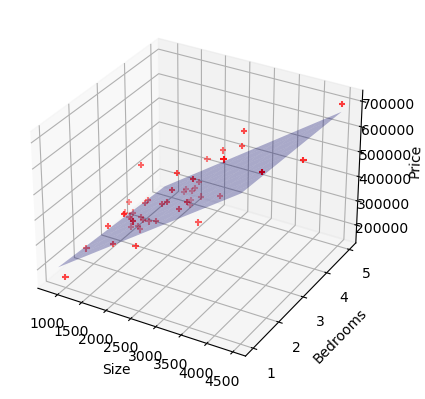

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer le nuage de points
ax.scatter(data['Size'], data['Bedrooms'], data['Price'], c='r', marker='+')

# Création d'une grille pour le plan de régression
size_range = np.linspace(min(data['Size']), max(data['Size']), 10)
bedrooms_range = np.linspace(min(data['Bedrooms']), max(data['Bedrooms']), 10)
size_grid, bedrooms_grid = np.meshgrid(size_range, bedrooms_range)


# Calculer les moyennes et les écarts-types des caractéristiques
mean = np.mean(data[['Size', 'Bedrooms']], axis=0)
std = np.std(data[['Size', 'Bedrooms']], axis=0)

# Création d'une grille pour le plan de régression
size_range = np.linspace(min(data['Size']), max(data['Size']), 10)
bedrooms_range = np.linspace(min(data['Bedrooms']), max(data['Bedrooms']), 10)
size_grid, bedrooms_grid = np.meshgrid(size_range, bedrooms_range)
price_grid = theta[0] + theta[1] * ((size_grid - mean[0]) / std[0]) + theta[2] * ((bedrooms_grid - mean[1]) / std[1])

# Affichage du plan de régression
ax.plot_surface(size_grid, bedrooms_grid, price_grid, color='blue', alpha=0.3, label='Linear Regression')

# Définir les étiquettes des axes
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

plt.show()


Fin.